In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [6]:
#########################################
# part (a)
#########################################

def normalize(a):
    return (a-a.mean())/a.std()

def h(X, theta):
    return X@theta

def J(X, Y, theta):
    return ((Y-X@theta)**2).mean()/2

def grad_J(X, Y, theta):
    return X.T@(X@theta - Y)/len(Y)

def gradient_descent(X, Y, theta, eta=0.01, stop_lim=0.0001, t_lim=10000):
    
    theta_pts = [theta]
    
    t = 0
    
    while t < t_lim:
        loss_grad = grad_J(X,Y,theta_pts[-1])
        theta_n = theta_pts[-1] - eta*loss_grad
        
        if (abs(theta_n - theta_pts[-1]).max() < stop_lim):
            break
        
        theta_pts.append(theta_n)
        
        t += 1
            
    return theta_pts

class NormalizedLinearRegressor:
    
    def __init__(self,theta=np.array([[0],[0]])):
        self.theta = theta
        
    def fit(self,x,y,**kwargs):
        self.mean_x = x.mean()
        self.std_x = x.std()
        self.mean_y = y.mean()
        self.std_y = y.std()
        self.m = len(y)
        
        X = np.column_stack([np.full(self.m,1),normalize(x)])
        Y = normalize(y).reshape(-1,1)
        
        self.theta = gradient_descent(X,Y,self.theta,**kwargs)[-1]
    
    def predict(self,x):
        
        X = np.column_stack([np.full(len(x),1),(x-self.mean_x)/self.std_x])
        Y = X@self.theta
        
        return (Y.flatten()*self.std_y) + self.mean_y

In [7]:
#########################################
# part (b)
#########################################

def get_2d_coords(X, Y, theta):
    return (np.squeeze(X.T[1]),np.squeeze(Y),np.squeeze(theta))

def plot_data(X, Y, theta, save_file_name=None):
    fig = plt.figure(dpi=150,figsize=(5,3))
    ax = fig.add_axes([0,0,1,1])
    
    x,y,t = get_2d_coords(X,Y,theta)
    
    ax.set_title("Plot of normalized density vs acidity")
    ax.scatter(x,y,marker='.')
    ax.set_xlabel("acidity")
    ax.set_ylabel("density")
    ax.axline((0, t[0]), slope=t[1], color='red', label='regression fit')
    ax.legend()
    
    if (save_file_name):
        fig.savefig(f'plots/{save_file_name}.png', bbox_inches = 'tight')
        
    # return fig

In [8]:
#########################################
# part (c)
#########################################

def generate_loss_space(X,Y,t0_range,t1_range,t0_num,t1_num):
    t0_space = np.linspace(t0_range[0],t0_range[1],t0_num)
    t1_space = np.linspace(t1_range[0],t1_range[1],t1_num)
    t_meshgrid = np.meshgrid(t0_space, t1_space)
    t_space  = np.stack(t_meshgrid, axis=2).reshape((t0_num,t1_num,2,1))

    vector_loss = np.vectorize(J, signature='(m,2),(m,1),(2,1)->()')
    loss_space = vector_loss(X, Y, t_space)

    return (t_meshgrid[0], t_meshgrid[1], loss_space)

def plot_mesh(X, Y, descent_path, elev=60, azim=45, save_file_name=None, alpha=0.5):

    vector_loss = np.vectorize(J, signature='(m,2),(m,1),(2,1)->()')
    (t0_space, t1_space, loss_space) = generate_loss_space(X,Y,(-2,2),(-2,2),25,25)
    
    fig = plt.figure(figsize=(5,5), dpi=150)
    ax = fig.add_axes([0,0,1,1], projection='3d')
    ax.view_init(elev=elev, azim=azim)
    surf = ax.plot_surface(t0_space, t1_space, loss_space, cmap='viridis', edgecolor=None, alpha=alpha)
    #surf.set_facecolor((0,0,0,0))
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_zlabel('loss')
    
    desc_x, desc_y = np.stack(descent_path,axis=0).reshape((len(descent_path),2)).T
    desc_vals = vector_loss(X,Y,np.array(descent_path))

    ax.plot(desc_x, desc_y, desc_vals, marker='.',color='r')
        
    if (save_file_name):
        fig.savefig(f'plots/{save_file_name}.png', bbox_inches = 'tight')
        
    # return fig

In [9]:
#########################################
# part (d)
#########################################

def plot_contour(x, y, descent_path, save_file_name=None):

    (t0_space, t1_space, loss_space) = generate_loss_space(X,Y,(-2,2),(-2,2),25,25)

    fig = plt.figure(figsize=(3,3), dpi=150)
    ax = fig.add_axes([0,0,1,1])
    CS = plt.contour(t0_space, t1_space, loss_space)
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    
    #plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    desc_x, desc_y = np.stack(descent_path,axis=0).reshape((len(descent_path),2)).T
    
    ax.plot(desc_x, desc_y, marker='.',color='r')

    
    if (save_file_name):
        fig.savefig(f'plots/{save_file_name}.png', bbox_inches = 'tight')
        
    # return fig

In [10]:
if __name__ == "__main__" and "__file__" in globals():
    if len(sys.argv) < 3:
        print("ERROR: this script requires a train and test directory. Exiting.")
    
    train_dir, test_dir = sys.argv[1],sys.argv[2]
    trainX = np.loadtxt(f"{train_dir}/X.csv")
    trainY = np.loadtxt(f"{train_dir}/Y.csv")
    testX = np.loadtxt(f"{test_dir}/X.csv")
    
    regressor = NormalizedLinearRegressor()
    regressor.fit(trainX,trainY)
    preds = regressor.predict(testX)
    np.savetxt("result_1.txt",preds)

In [162]:
# [StopConvert]

In [192]:
trainX = np.loadtxt('../data/q1/X.csv')
trainY = np.loadtxt('../data/q1/Y.csv')
normX = normalize(trainX)
normY = normalize(trainY)

X = np.column_stack([np.full(len(normX),1),normX])
Y = normY.reshape(-1,1)

In [201]:
thetas = gradient_descent(X, Y, np.array([[1.5],[-2]]))
print(thetas[-1])

[[0.00561383]
 [0.6451277 ]]


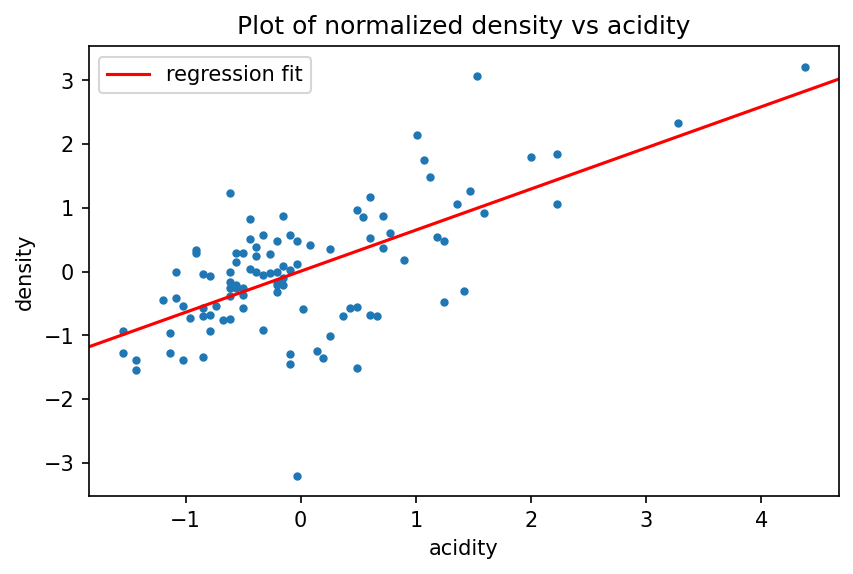

In [195]:
plot_data(X,Y,thetas[-1],save_file_name="b_plot")

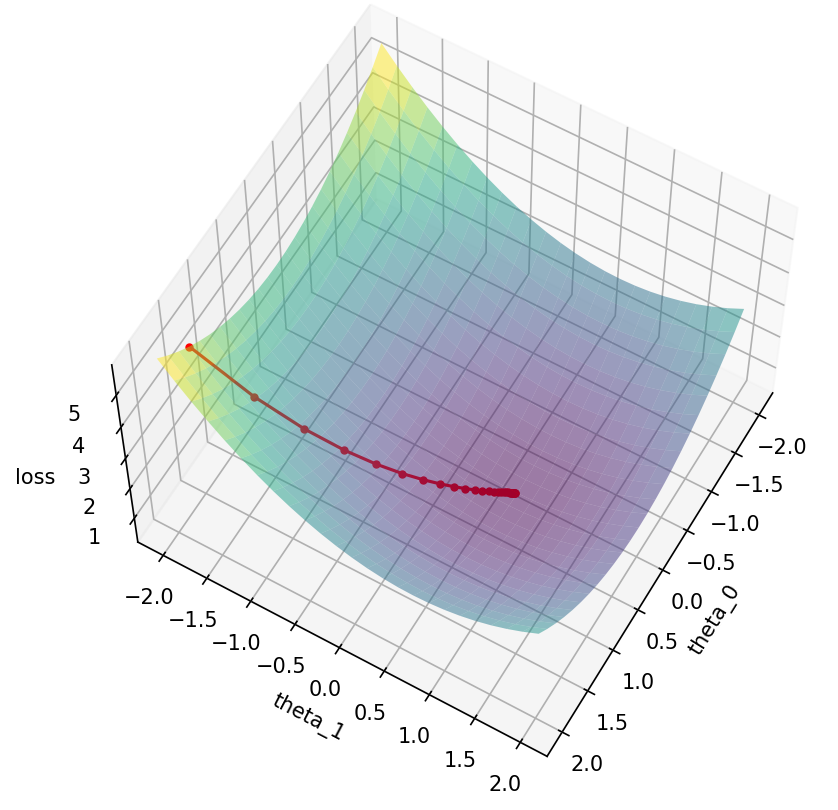

In [196]:
plot_mesh(X,Y,thetas[::20],elev=60,azim=30,alpha=0.5,save_file_name="c_mesh")

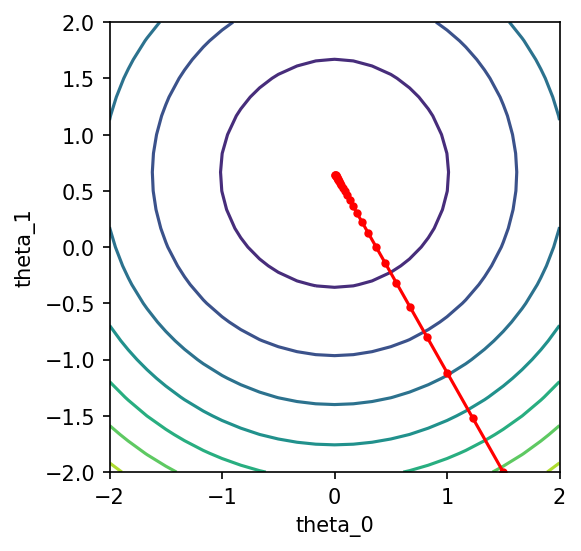

In [197]:
plot_contour(X,Y,thetas[::20],save_file_name='d_contour')

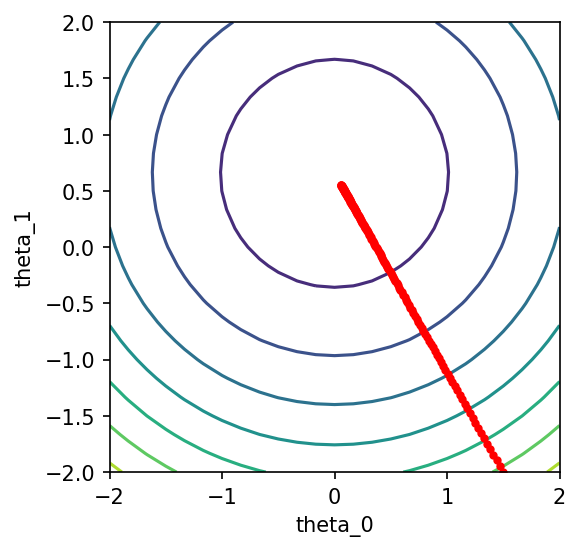

In [198]:
thetas = gradient_descent(X, Y, np.array([[1.5],[-2]]), eta=0.001)
plot_contour(X,Y,thetas[::20],save_file_name='e_contour_001')

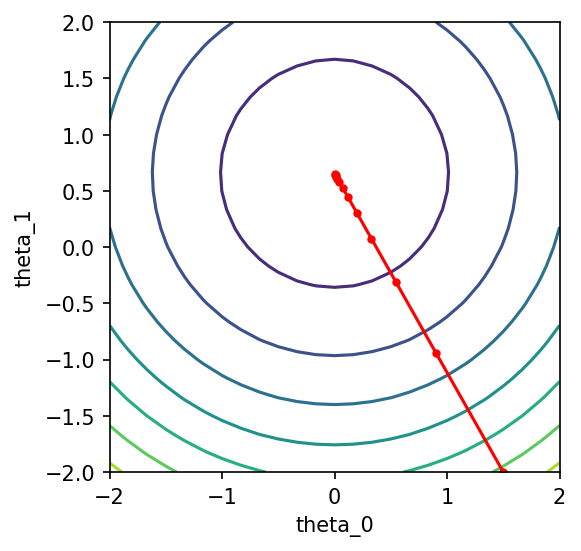

In [199]:
thetas = gradient_descent(X, Y, np.array([[1.5],[-2]]), eta=0.025)
plot_contour(X,Y,thetas[::20],save_file_name='e_contour_025')

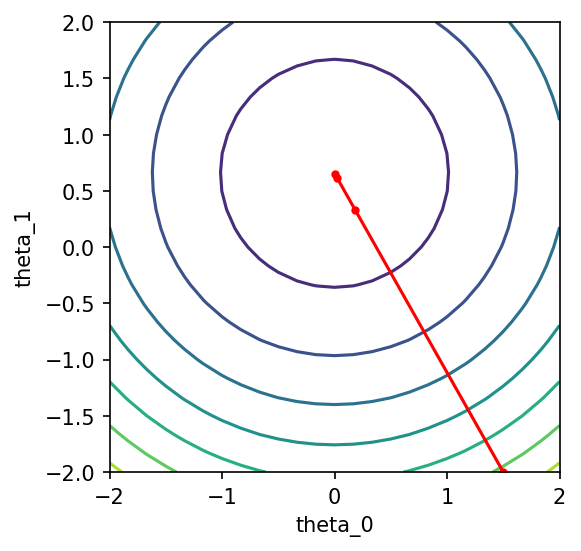

In [200]:
thetas = gradient_descent(X, Y, np.array([[1.5],[-2]]), eta=0.1)
plot_contour(X,Y,thetas[::20],save_file_name='e_contour_1')